## Installing and Importing Biopython Package

In [ ]:
# !pip install Biopython

In [ ]:
import Bio.SeqIO

## Part 1: Reading & Parsing FASTA File

In [ ]:
fasta_content = Bio.SeqIO.parse('genes.fa', 'fasta')

In [ ]:
next(iter(fasta_content))

SeqRecord(seq=Seq('atgtcaatggtaagaaatgtatcaaatcagagcgaaaaattggaaattttgtca...tga'), id='2L52.1a', name='2L52.1a', description='2L52.1a', dbxrefs=[])

In [ ]:
sequence = next(iter(fasta_content))

In [ ]:
print(f'sequence.id: {sequence.id}')
print(f'sequence.seq: {sequence.seq}')
print(f'sequence.name: {sequence.name}')
print(f'sequence.description: {sequence.description}')

sequence.id: 2L52.1b
sequence.seq: atgtcagataatgaagaagtatatgtgaacttccgtggaatgaactgtatctcaacaggaaagtcggccagtatggtcccgagcaaacgaagaaattggccaaaaagagtgaagaaaaggctatcgacacaaagaaacaatcagaaaactattcgaccaccagagctgaataaaaataatatagagataaaagatatgaactcaaataaccttgaagaacgcaacagagaagaatgcattcagcctgtttctgttgaaaagaacatcctgcattttgaaaaattcaaatcaaatcaaatttgcattgttcgggaaaacaataaatttagagaaggaacgagaagacgcagaaagaattctggtgaatcggaagacttgaaaattcatgaaaactttactgaaaaacgaagacccattcgatcatgcaaacaaaatataagtttctatgaaatggacggggatatagaagaatttgaagtgtttttcgatactcccacaaaaagcaaaaaagtacttctggatatctacagtgcgaagaaaatgccaaaaattgaggttgaagattcattagttaataagtttcattcaaaacgtccatcaagagcatgtcgagttcttggaagtatggaagaagtaccatttgatgtggaaataggatattga
sequence.name: 2L52.1b
sequence.description: 2L52.1b


In [ ]:
fasta_content = Bio.SeqIO.parse('genes.fa', 'fasta')
index = 2
for i, content in enumerate(fasta_content):
  if i  == index:
    print(content.id)
    print(content.seq)
    break

2RSSE.1a
atgacagtggcgagttacagtatggtgctgtgtggctcatctgatgatcatcgctatcgaggcagaatcgaaaaagtaaaattcggcgtacccataaacgaagcatttgcccatgacattcccgccacgcttctcatgctcttgctcaaagtgaacaaggatggacccgcgaaaaaggatatttggcgagcgcccggaaatcaggctcaagtgcgaaaattgtcgcaagtgatgcaacacgggcggcttgtaaatatcgagaatttcacggtttacacggcggcatctgtcatcaaaaagtttctttcaaagttgccaaacggcatttttggacgggataatgaggagacactgttcaatagtgcatcgactggaatggatattgagaagcagagacaggtgttttataggatatttggatcacttccagtcgcatcccaacacttgctcgtcctacttttcggcacatttcgggtcgtcgccgactcgtcggacggtcattcgaacgcgatgaacccgaatgcgatcgcgatttcggtggcaccatcgctttttcacacttgtatacacgatggacggacggcgcgagtagaagaccttcaacggttcaagctggcctcgaacattgtgtgctcgataatttgctcattcggcgacacgaagctcttcccacgcgagtgctacgagtattacgccagatacacgggtcgcacgttgcgaatcgacgagaatcgaatgttcacttttcataatccatccaaccgtcgtgctcgtggcgaagagttctccgcgttggcggcaaagtgtgcgggcgcctactcgctggccgccatccacctggccgaagaagcgtcaccggagcccactccgacaacctcgaagcctccacgtggcaacggcgtcgggcgtgccgggagtctgaagcagcacgcgttgacccagacgacggatcatccgaagagaagcgtgtcgatcgcggctaaggatccgt

## Part 2: Simple Sequence Analysis
- Complementary
- Reverse Complementary
- Transcription
- Length
- GC content
- GC-skew
- Melting point
- Mol weight
- pairwise alignment

In [ ]:
import Bio.SeqIO
from Bio import pairwise2
from Bio.SeqUtils import molecular_weight

In [ ]:
sequence2 = str(next(iter(fasta_content)).seq)

In [ ]:
# Complement
complement_seq = sequence.seq.complement()
print(f'complement_seq:{complement_seq}\n')

# Reverse Complement
rev_complement_seq = sequence.seq.reverse_complement()
print(f'rev_complement_seq:{rev_complement_seq}\n')

# Transcribe
transcript = sequence.seq.transcribe()
print(f'transcript:{transcript}\n')

# Length
length = len(sequence.seq)
print(f'length:{length}\n')


# GC Content
gc_content = sequence.seq.upper().count('G') + sequence.seq.upper().count('C')/len(sequence.seq)
print(f'gc_content:{gc_content}')

# GC Skew
gc_skew = (sequence.seq.upper().count('G') - sequence.seq.upper().count('C')) / (sequence.seq.upper().count('G') + sequence.seq.upper().count('C'))
print(f'gc_skew:{gc_skew}')

# Melting Point
melting_point = 4*sequence.seq.upper().count('G') + 2*sequence.seq.upper().count('C')
print(f'melting_point:{melting_point}')

# Molecular Weight
mol_wt = molecular_weight(sequence.seq, seq_type="DNA")
print(f'mol_wt:{mol_wt}')


# Pairwise Alignment
Sequence1 = str(sequence.seq)
sequence2 = str(next(iter(fasta_content)).seq)
alignments = pairwise2.align.globalms(Sequence1, sequence2, 2, -1, -2, -0.5)
# Process each alignment
alignment = alignments[0]
# formatted_alignment = pairwise2.format_alignment(*alignment)


# Extract alignment details
aligned_seq1 = alignment[0]  # Aligned sequence 1
aligned_seq2 = alignment[1]  # Aligned sequence 2
score = alignment[2]  # Alignment score
start1 = alignment[3]  # Start position of sequence 1
end1 = alignment[4]  # End position of sequence 1

# Calculate identity (matches/total length)
matches = sum(1 for a, b in zip(aligned_seq1, aligned_seq2) if a == b)
identity = matches / len(aligned_seq1) * 100  # Percentage identity

# Calculate the alignment length
alignment_length = len(aligned_seq1)  # Should be the same as len(aligned_seq2)

# Calculate start and end positions for seq2 based on aligned seq1
start2 = aligned_seq2.find(aligned_seq1[0])  # Find the alignment start position for seq2
end2 = start2 + len(aligned_seq1) - 1  # Calculate the end position for seq2 based on alignment length

with open('pairwise_alignment.txt', 'a') as f:
  # f.write(formatted_alignment + "\n")
  f.write(f"Alignment score: {score}\n")
  f.write(f"Identity: {identity:.2f}%\n")
  f.write(f"Alignment length: {alignment_length}\n")
  f.write(f"Start position in seq1: {start1}, End position in seq1: {end1}\n")
  f.write(f"Start position in seq2: {start2}, End position in seq2: {end2}\n\n")
  # f.write(f"Aligned sequences:\n{aligned_seq1}\n{aligned_seq2}")

complement_seq:tacagtctattacttcttcatatacacttgaaggcaccttacttgacatagagttgtcctttcagccggtcataccagggctcgtttgcttctttaaccggtttttctcacttcttttccgatagctgtgtttctttgttagtcttttgataagctggtggtctcgacttatttttattatatctctattttctatacttgagtttattggaacttcttgcgttgtctcttcttacgtaagtcggacaaagacaacttttcttgtaggacgtaaaactttttaagtttagtttagtttaaacgtaacaagcccttttgttatttaaatctcttccttgctcttctgcgtctttcttaagaccacttagccttctgaacttttaagtacttttgaaatgactttttgcttctgggtaagctagtacgtttgttttatattcaaagatactttacctgcccctatatcttcttaaacttcacaaaaagctatgagggtgtttttcgttttttcatgaagacctatagatgtcacgcttcttttacggtttttaactccaacttctaagtaatcaattattcaaagtaagttttgcaggtagttctcgtacagctcaagaaccttcataccttcttcatggtaaactacacctttatcctataact

rev_complement_seq:tcaatatcctatttccacatcaaatggtacttcttccatacttccaagaactcgacatgctcttgatggacgttttgaatgaaacttattaactaatgaatcttcaacctcaatttttggcattttcttcgcactgtagatatccagaagtacttttttgctttttgtgggagtatcgaaaaacacttcaaattcttctatatccccgtccatttcatagaaacttatattttgtttgcatgatcgaatgggtcttcgtttttcagtaaagttttcatgaattttcaagtcttccgattca

## Part 3: Making a tabular data

In [81]:
fasta_content = Bio.SeqIO.parse('genes.fa', 'fasta')
with open('Seq_information.txt', 'w') as f:
  f.write('Seq ID\tLength\tGC Content\tGC Skew\tMelting Point\tMol Weight\n')
  for content in fasta_content:
    length = len(content.seq)
    gc_content = round(content.seq.upper().count('G') + content.seq.upper().count('C')/len(content.seq),2)
    gc_skew = round((content.seq.upper().count('G') - content.seq.upper().count('C')) / (content.seq.upper().count('G') + content.seq.upper().count('C')), 2)
    melting_point = round(4*content.seq.upper().count('G') + 2*content.seq.upper().count('C'),2)
    mol_wt = round(molecular_weight(content.seq, seq_type="DNA"), 2)
    f.write(f'{content.id}\t{length}\t{gc_content}\t{gc_skew}\t{melting_point}\t{mol_wt}\n')

## Part 4: Data Visualization

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('Seq_information.txt', sep='\t')
df.head()

,Seq ID,Length,GC Content,GC Skew,Melting Point,Mol Weight
0,2L52.1a,1284,287.15,0.20,1534,399363.14
1,2L52.1b,663,135.15,0.16,736,206073.35
2,2RSSE.1a,1032,275.26,0.02,1628,319168.29
3,2RSSE.1b,1437,370.26,0.00,2218,444266.16
4,3R5.1a,648,142.20,0.04,828,200484.11


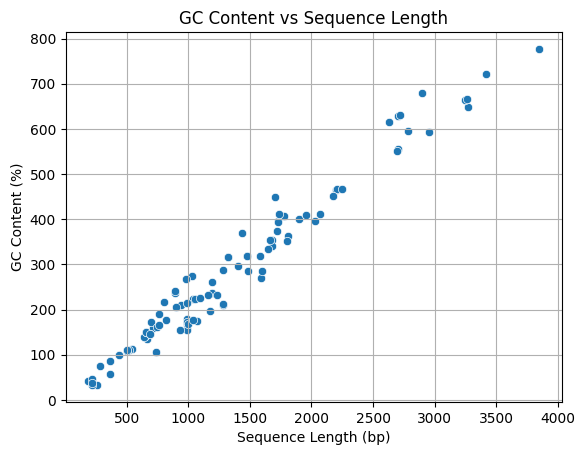

In [86]:
# Scatter Plot: GC Content vs Sequence Length
sns.scatterplot(x='Length', y='GC Content', data=df)
plt.title('GC Content vs Sequence Length')
plt.xlabel('Sequence Length (bp)')
plt.ylabel('GC Content (%)')
plt.grid(True)
plt.show()

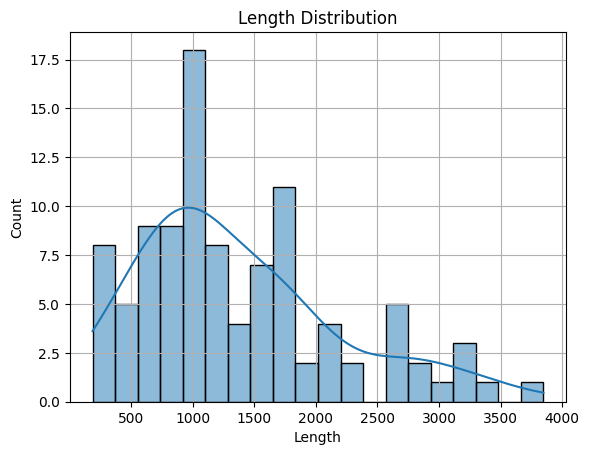

In [89]:
# Histogram: Sequence Length Distribution
sns.histplot(df['Length'], bins=20, kde=True)
plt.title('Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

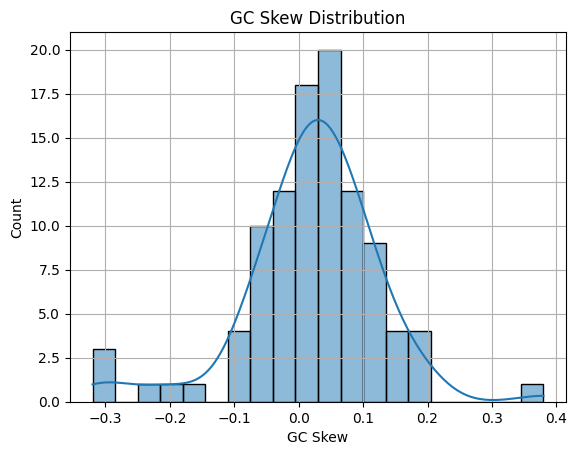

In [90]:
# Histogram: GC Skew Distribution
sns.histplot(df['GC Skew'], bins=20, kde=True)
plt.title('GC Skew Distribution')
plt.xlabel('GC Skew')
plt.ylabel('Count')
plt.grid(True)
plt.show()

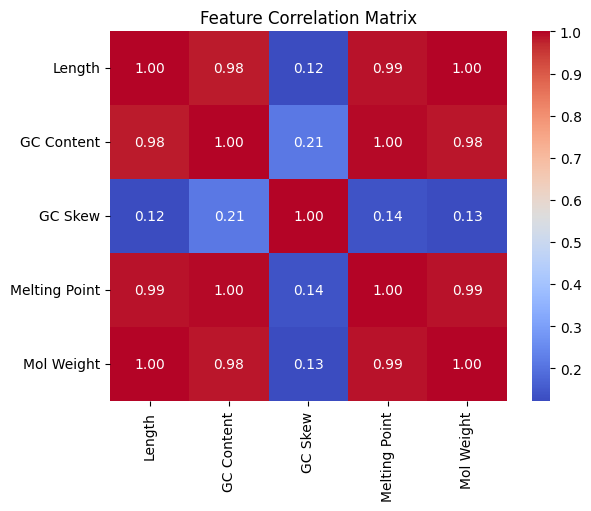

In [91]:
# Heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()